## Problem Statement

**The Toxic Pesticides**

*Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.*

In [67]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler  
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

In [2]:
#Load datasets
train=pd.read_csv('train_agriculture.csv')
test=pd.read_csv('test_agriculture.csv')
sample_sub=pd.read_csv('sample_submission_agriculture.csv')

In [3]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [5]:
sample_sub.head()

,Unnamed: 0,ID,Crop_Damage
0,0,F00000002,1
1,1,F00000011,1
2,2,F00000014,1
3,3,F00000015,1
4,4,F00000016,1


In [6]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------        

(None, None)

In [7]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [8]:
test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,53417.000000,59310.000000,59310.000000
mean,1397.014129,0.287068,0.455117,2.263227,25.851880,28.705094,9.528376,1.900877
std,849.425808,0.452397,0.497986,0.461733,15.481957,12.421211,9.855341,0.701934
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


In [9]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [10]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [11]:
# fill up missing values with median
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].median())
test['Number_Weeks_Used'] = test['Number_Weeks_Used'].fillna(test['Number_Weeks_Used'].median())

In [12]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

<AxesSubplot:>

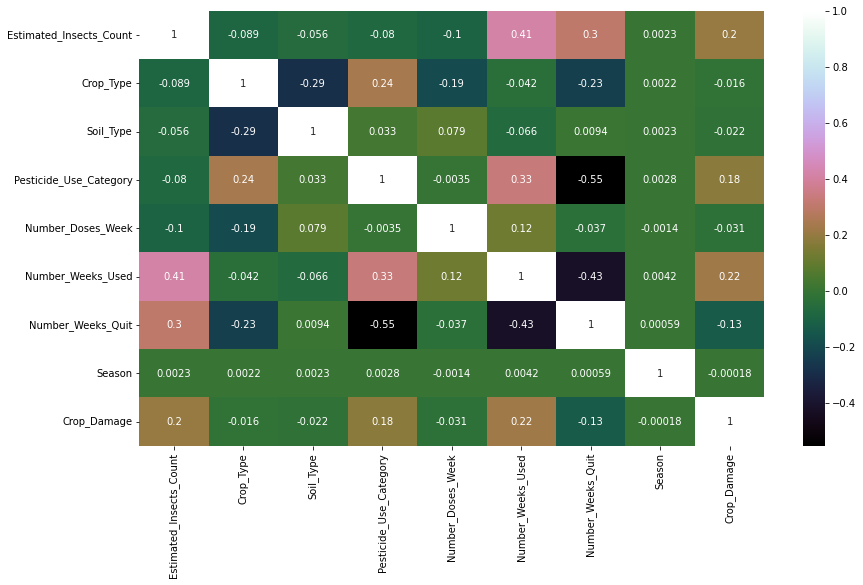

In [13]:
plt.figure(figsize=(14,8))
sns.heatmap(train.corr(), annot=True, cmap='cubehelix')

## Data Preprocessing

In [14]:
damage = train.groupby(by=("Crop_Damage")).count().reset_index()
damage

,Crop_Damage,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,74238,74238,74238,74238,74238,74238,74238,74238,74238
1,1,12307,12307,12307,12307,12307,12307,12307,12307,12307
2,2,2313,2313,2313,2313,2313,2313,2313,2313,2313


C:\Users\anoop\Data Science\envs\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Crop_Damage', ylabel='Density'>

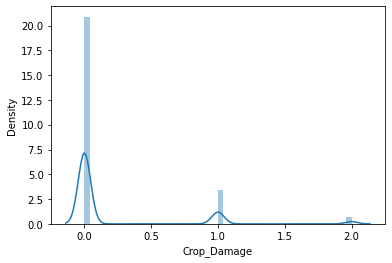

In [15]:
sns.distplot(train['Crop_Damage'])

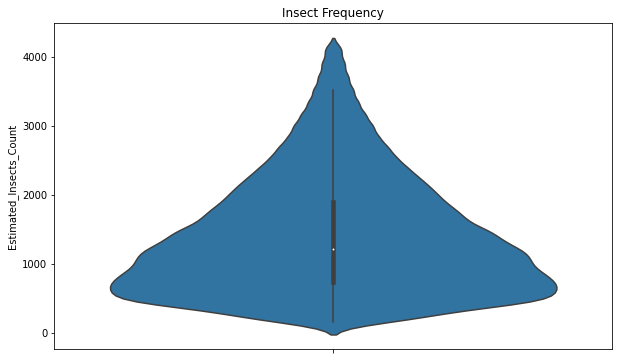

In [16]:
plt.figure(figsize=(10,6))
plt.title("Insect Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Estimated_Insects_Count"])
plt.show()

In [17]:
insect = train.groupby(by=("Estimated_Insects_Count"))["Crop_Damage"].sum().reset_index()
insect

,Estimated_Insects_Count,Crop_Damage
0,150,13
1,151,2
2,168,12
3,169,2
4,188,10
...,...,...
66,3702,261
67,3895,159
68,3896,57
69,4096,111


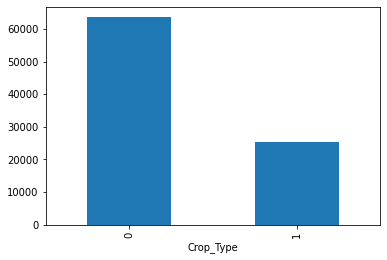

In [18]:
train.groupby('Crop_Type')['Crop_Damage'].count().plot.bar(ylim=0)
plt.show()

In [19]:
crop = train.groupby(by=("Crop_Type"))["Crop_Damage"].sum().reset_index()
crop

,Crop_Type,Crop_Damage
0,0,12418
1,1,4515


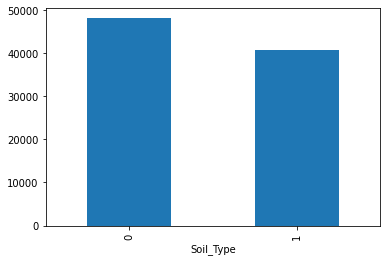

In [20]:
train.groupby('Soil_Type')['Crop_Damage'].count().plot.bar(ylim=0)
plt.show()

In [21]:
soil = train.groupby(by=("Soil_Type"))["Crop_Damage"].sum().reset_index()
soil

,Soil_Type,Crop_Damage
0,0,9613
1,1,7320


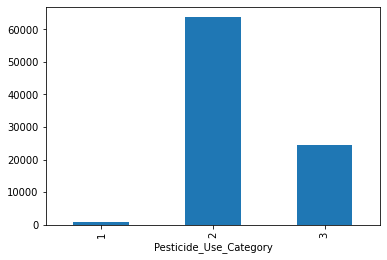

In [22]:
train.groupby('Pesticide_Use_Category')[ 'Crop_Damage'].count().plot.bar(ylim=0)
plt.show()

In [23]:
pest = train.groupby(by=("Pesticide_Use_Category"))["Crop_Damage"].sum().reset_index()
pest

,Pesticide_Use_Category,Crop_Damage
0,1,884
1,2,7430
2,3,8619


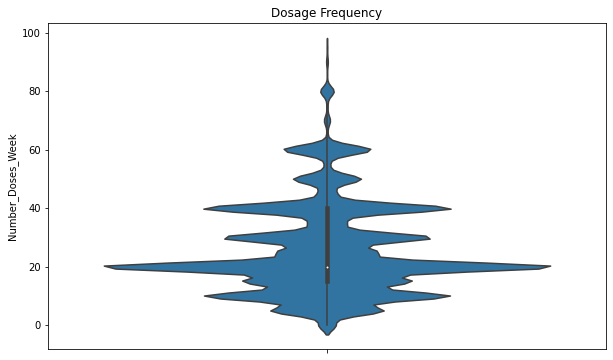

In [24]:
plt.figure(figsize=(10,6))
plt.title("Dosage Frequency")
sns.axes_style("darkgrid")
sns.violinplot(y=train["Number_Doses_Week"])
plt.show()

In [25]:
dose = train.groupby(by=("Number_Doses_Week"))["Crop_Damage"].sum().reset_index()
dose

,Number_Doses_Week,Crop_Damage
0,0,884
1,5,553
2,10,1836
3,15,1190
4,20,5558
5,25,692
6,30,2061
7,35,215
8,40,2615
9,45,81


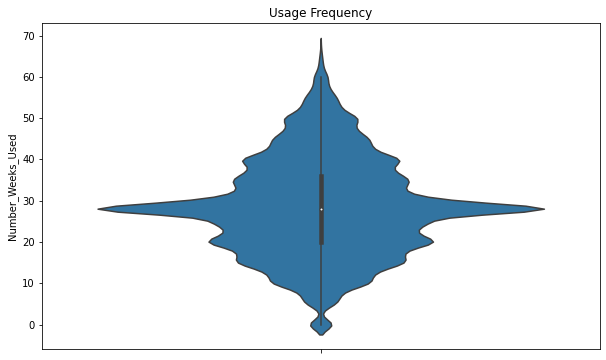

In [26]:
plt.figure(figsize=(10,6))
plt.title("Usage Frequency")
sns.axes_style("darkgrid")
sns.violinplot(y=train["Number_Weeks_Used"])
plt.show()


In [27]:
train.Number_Weeks_Used=train.Number_Weeks_Used.astype(int)
test.Number_Weeks_Used=test.Number_Weeks_Used.astype(int)

In [28]:
week = train.groupby(by=("Number_Weeks_Used"))["Crop_Damage"].sum().reset_index()
week

,Number_Weeks_Used,Crop_Damage
0,0,771
1,5,33
2,6,15
3,7,18
4,8,32
...,...,...
59,63,21
60,64,21
61,65,23
62,66,8


In [29]:
train.Number_Weeks_Used=train.Number_Weeks_Used.astype(int)
test.Number_Weeks_Used=test.Number_Weeks_Used.astype(int)

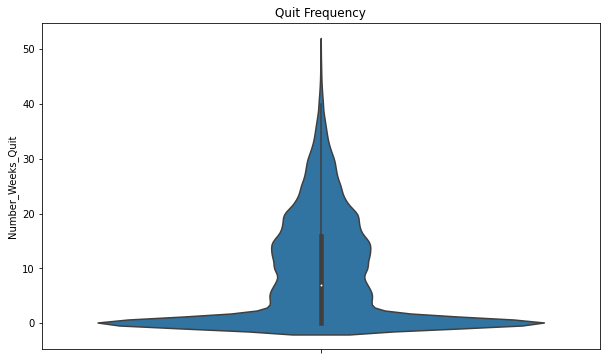

In [30]:
plt.figure(figsize=(10,6))
plt.title("Quit Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Number_Weeks_Quit"])
plt.show()

In [31]:
quit = train.groupby(by=("Number_Weeks_Quit"))["Crop_Damage"].sum().reset_index()
quit

,Number_Weeks_Quit,Crop_Damage
0,0,9557
1,1,147
2,2,241
3,3,286
4,4,278
5,5,390
6,6,326
7,7,308
8,8,277
9,9,231


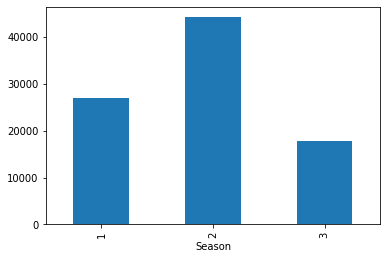

In [32]:
train.groupby('Season')['Crop_Damage'].count().plot.bar(ylim=0)
plt.show()

In [33]:
season = train.groupby(by=("Season"))["Crop_Damage"].sum().reset_index()
season

,Season,Crop_Damage
0,1,5070
1,2,8543
2,3,3320


## Feature Selection

In [34]:
#set up features
features=['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Number_Doses_Week',
          'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season']

train_labels = np.array(train.Crop_Damage.values.reshape(-1, 1), dtype=np.float32)

In [35]:
#define x, y and x_test
X=train[features]
y=train_labels
X_test=test[features]

In [36]:
#scale x, y and x_test
scaler=MinMaxScaler(feature_range=(0, 2), copy=True)

X=scaler.fit_transform(X)
y=scaler.fit_transform(y)
X_test=scaler.fit_transform(X_test)

### Over sampling using SMOTE

In [37]:
X, y = SMOTE().fit_resample(X, y)

### Under sampling using RandomUnderSampler  

In [38]:
X, y = RandomUnderSampler().fit_resample(X, y)

In [39]:
#split training set for training and testing

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.10, stratify=y)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((200442, 8), (22272, 8), (200442,), (22272,))

In [40]:
#Create an XGB classifier and instance of the same
model = XGBClassifier().fit(X_train, y_train)
model

C:\Users\anoop\Data Science\envs\Python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [41]:
print(model.score(X_train, y_train))

0.8028756448249369


In [42]:
y_pred = model.predict(X_val)
y_pred

array([0., 2., 2., ..., 0., 2., 2.], dtype=float32)

In [43]:
print(model.score(X_val, y_val))

0.7913074712643678


In [44]:
#importing library and segregation of data as train and test using DMatrix Data structure
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)

#format x, y, and x_test
dX=xgb.DMatrix(X, label=y)
DXtest=xgb.DMatrix(X_test)

In [46]:
#paramaters 
params = {
    'max_depth': 25,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 10  # the number of training iterations

In [47]:
#model builing using training data
bst = xgb.train(params, dtrain, num_round)
bst

[16:24:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:24:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
#To calculate predication using test data
y_predict = bst.predict(dtest)
y_predict

array([0., 2., 2., ..., 1., 2., 2.], dtype=float32)

In [49]:
y_predict=y_predict.flatten()
y_val=y_val.flatten()

df=pd.DataFrame({'Actual': y_val, 'Predicted':y_predict})
df

,Actual,Predicted
0,0.0,0.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0
4,0.0,0.0
...,...,...
22267,2.0,2.0
22268,1.0,0.0
22269,1.0,1.0
22270,2.0,2.0


In [54]:
accuracy_score(y_val, y_pred), f1_score(y_val, y_pred, average='weighted'), recall_score(y_val, y_pred, average='weighted')

(0.7913074712643678, 0.7846586734150778, 0.7913074712643678)

In [55]:
#Create a confusion matrix
confusion_matrix(y_val, y_pred)

array([[7037,  322,   65],
       [ 909, 4334, 2181],
       [ 136, 1035, 6253]], dtype=int64)

In [56]:
#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_val, y_pred))

#Create DataFrame from confmtrx array 
pd.DataFrame(confmtrx, index=['Alive','Other_Causes', 'Pesticides'],
columns=['predicted_Alive', 'predicted_Other_Causes', 'predicted_Pesticides'])

,predicted_Alive,predicted_Other_Causes,predicted_Pesticides
Alive,7037,322,65
Other_Causes,909,4334,2181
Pesticides,136,1035,6253


In [60]:
#Accuracy statistics
print('Accuracy Score:',accuracy_score(y_val, y_pred))  

#Create classification report
class_report=classification_report(y_val, y_pred)
print(class_report)

Accuracy Score: 0.7913074712643678
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      7424
         1.0       0.76      0.58      0.66      7424
         2.0       0.74      0.84      0.79      7424

    accuracy                           0.79     22272
   macro avg       0.79      0.79      0.78     22272
weighted avg       0.79      0.79      0.78     22272



In [61]:
bst.dump_model('model_raw.txt')
bst

In [62]:
#Prediction using test data
preds = bst.predict(dtest)
preds

array([0., 2., 2., ..., 1., 2., 2.], dtype=float32)

In [63]:
print(precision_score(y_val, preds, average='macro'))

0.882858557762701


In [65]:
#Saving the model in pkl file
import joblib

joblib.dump(bst, 'bst_model.pkl', compress=True)
bst = joblib.load('bst_model.pkl') # load it later

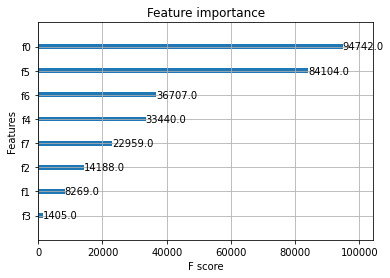

In [68]:
#Feature importance
xgb.plot_importance(bst)
plt.show()

In [69]:
#Prediction using test data
preds = bst.predict(DXtest)
preds

array([0., 1., 1., ..., 1., 0., 0.], dtype=float32)

In [70]:
#Calculating prediction accuracy
final_preds = np.asarray([np.argmax(line) for line in preds])
final_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
submission = pd.DataFrame({
        "ID": test.ID,
        "Crop_Damage": final_preds.flatten()
    })
submission.to_csv('submission.csv', index=False)
submission

,ID,Crop_Damage
0,F00000002,0
1,F00000007,0
2,F00000011,0
3,F00000013,0
4,F00000014,0
...,...,...
59305,F00155937,0
59306,F00155940,0
59307,F00155941,0
59308,F00155943,0
